# Titanic: Machine Learning from Disaster

**Start here! Predict survival on the Titanic and get familiar with ML basics**

### Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?**
    - Source
    - Details
    - Questionnaire
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype

#### 3. **Data Cleansing & EDA**
    - Checking Null values
    - Descriptive Statistics
    - Univariate Analysis
    - Multivariate Analysis
    - Label Encoding
    - Null values Imputation
    - Pearson Correlation

#### 5. **Modelling**
    - Splitting Data & Choosing Algorithms
    - Logistic Regression Implementation
    - Parameter Tuning
    - ROC-AUC
    - Choosing Final model
    - Predicting on test set
    - Model deployment details

#### 6. **Conclusion**

#### 7. **References**

#### 8. **What's next ?**<br><br>


### Reason for choosng this dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.


- Is the one of the most profound data set for beginners.


### Source :

- https://www.kaggle.com/c/titanic/data


### Details :

- The data has been split into two groups: training set (train.csv) & test set (test.csv)

    - The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

    - The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


- We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.



- Data Dictionary
    - survival : Survival 0 = No, 1 = Yes
    - pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
    - sex : Sex 
    - Age : Age in years
    - sibsp : # of siblings / spouses aboard the Titanic
    - parch : # of parents / children aboard the Titanic 
    - ticket : Ticket number
    - fare : Passenger fare
    - cabin : Cabin number
    - embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


- Variable Notes
    - pclass: A proxy for socio-economic status (SES), 1st = Upper / 2nd = Middle / 3rd = Lower
    - age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    - sibsp: The dataset defines family relations in this way, Sibling = brother, sister, stepbrother, stepsister While Spouse = husband, wife (mistresses and fiancés were ignored)
    - parch: The dataset defines family relations in this way, Parent = mother, father while Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
    
    
### Questionnaire :

- Can we figure how many Males / Females Survived ?


- Can we identify survival rate w.r.t Pclass ?


- How is our Target variable distributed ? is it Imbalanced ?
    

### **Objective :**

- The goal is to explore data, perform analysis and build a predictive model on a dataset using Logistic Regression as base estimator.


- Also, deploying model locally with the help of Flask.

### Loading dataset

In [1]:
#importing required scientific and vizualisations libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for dumping model on disk
from pickle import dump, load

#warning elimination
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting local path
path = 'D:/Data Science/DS Prac/ML Algo/Random Forest/'

In [3]:
#reading train set
train_df = pd.read_csv(path + 'train.csv', header=0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#reading test set
test_df = pd.read_csv(path + 'test.csv', header=0)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Shape of train & test dataset
print ('No. of Records in Training :', train_df.shape[0], '\nNo. of Features in Training : ', train_df.shape[1])
print ('\nNo. of Records in Test :', test_df.shape[0], '\nNo. of Features in Test : ', test_df.shape[1])

No. of Records in Training : 891 
No. of Features in Training :  12

No. of Records in Test : 418 
No. of Features in Test :  11


In [6]:
#dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Above results shows us that we've :
    - (5) x int64 datatype attributes
    - (2) x float64 datatype attributes.
    - (5) x object datatype attributes

### Data Cleaning, Feature Engineering & EDA

- In this section we'll examine descriptive stats, examine null values, etc


- Then we'll perform data Cleansing techniques.


- We'll also try to extract some more information.


- And Plot some Visuals as we move ahead ,i.e, Univariate & Multivariate plots.

In [7]:
# % null values calculation
print ("Training data:\n\n", train_df.isnull().sum() / train_df.shape[0]*100)
print ("\n\nTesting data:\n\n", test_df.isnull().sum() / test_df.shape[0]*100)

Training data:

 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Testing data:

 PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


- We can observe that we've approx. 77% of missing values for "Cabin" feature in both the data sets.


- Next, we got approx. 20% missing values for "Age" in both the datasets.


- While, "Embarked" in training set consists of some 0.22% of missing values while in Test we have 0.23% for "Fare"

In [8]:
#Descriptive stats for training

train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Abbott, Mr. Rossmore Edward",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From above results we can make up few things :

- We've 2 unique values in "Sex", 147 in "Cabin" , 3 in "Embarked".


- Mean Age is 30, Min. 0.5 and Max. as 80 (Rounded off).

In [9]:
#Descriptive stats for testing

test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"White, Mrs. John Stuart (Ella Holmes)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


From above results we can make up few things :

- Mean Age is 30, Min. 0.1 and Max. as 76 (Rounded off).

Text(0.5, 1.0, 'Class Count - Survival (Target)')

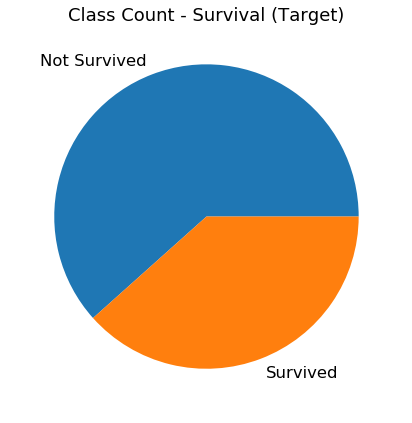

In [10]:
#Target class count
sns.set_context('talk')
train_df.Survived.value_counts().plot(kind='pie', labels=['Not Survived', 'Survived'], figsize=(7,7))
plt.ylabel('')
plt.title('Class Count - Survival (Target)')

- By above Viz. we cannot say that our dataset is imbalanced.


- Survived count is less than Not Survived Class.

Text(0.5, 1.0, 'Class Count - Embarked')

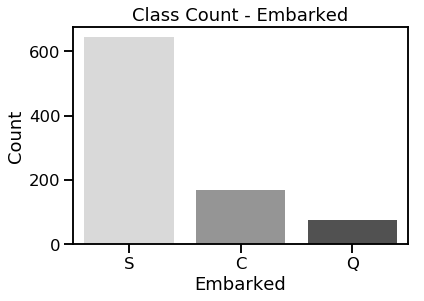

In [11]:
#Embark Class count

sns.countplot(train_df['Embarked'], palette='Greys')
plt.ylabel('Count')
plt.title('Class Count - Embarked')

- It is evident that most number of people embarked in Southampton, followed by Cherbourg and then Queenstown.


- We can replace the missing values in this section by Southampton since it's a most frequent place.

Text(0.5, 1.0, 'Distribution of Age')

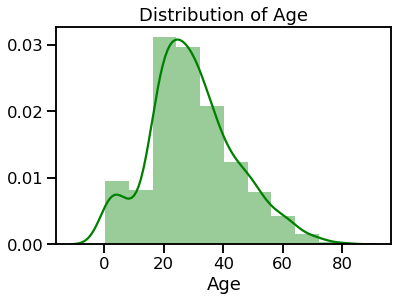

In [12]:
#Distribution of Age

sns.distplot(train_df.Age, bins=10, color='g')
plt.title('Distribution of Age')

- The spread of Age is slightly left skewed.


- But it is evident that we have dense count of people aged between 20 to 40.

Text(0.5, 1.0, 'Class Count - Sex')

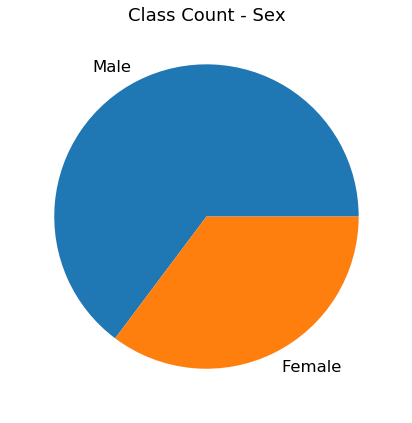

In [13]:
#Sex class count

train_df.Sex.value_counts().plot(kind='pie', labels=['Male', 'Female'], figsize=(7,7))
plt.ylabel('')
plt.title('Class Count - Sex')

- Above plot tells us that we've more number of Males than Females.

Text(0.5, 1.0, 'Spread of Fair')

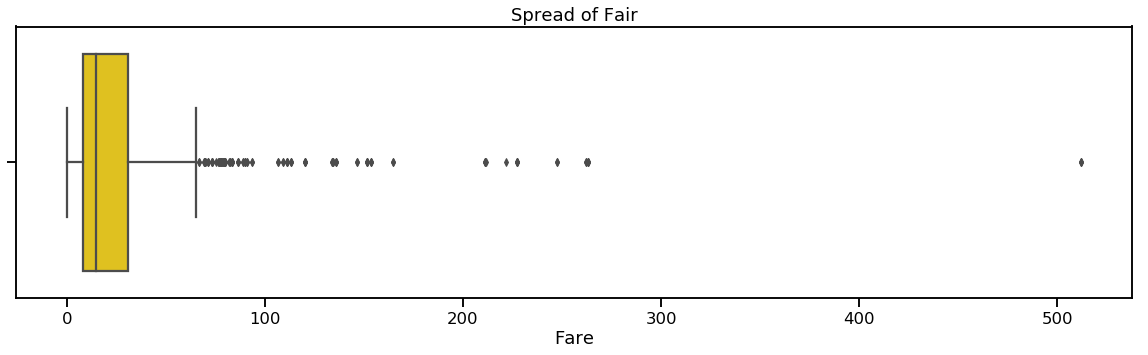

In [14]:
#spread of Fair

plt.figure(figsize=(20,5))
sns.boxplot(train_df.Fare, color='gold')
plt.title('Spread of Fair')

([<matplotlib.axis.XTick at 0x216f084d0b8>,
 <a list of 2 Text xticklabel objects>)

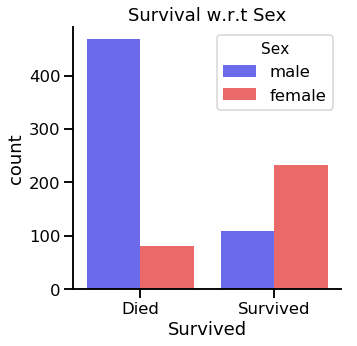

In [15]:
#survival count w.r.t sex

sns.catplot(data=train_df, x='Survived', hue='Sex', kind='count', palette='seismic', legend_out=False)
plt.title('Survival w.r.t Sex')
plt.xticks([0,1], ['Died','Survived'])

- It is evident that Female survived in huge number than males.


- Of course, females were given high priority.

([<matplotlib.axis.XTick at 0x216f0670438>,
 <a list of 3 Text xticklabel objects>)

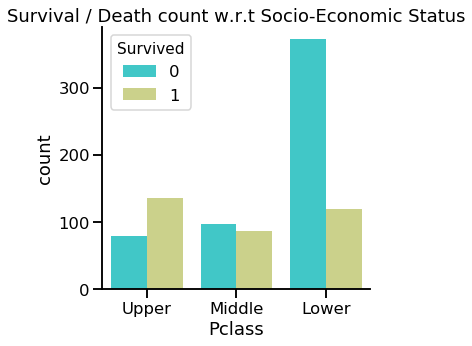

In [16]:
#survival / death rate w.r.t to Pclass

sns.catplot(data=train_df, x='Pclass', hue='Survived', kind='count', palette='rainbow', legend_out=False)
plt.title('Survival / Death count w.r.t Socio-Economic Status')
plt.xticks([0,1,2], ['Upper','Middle','Lower'])

- The toll on death in Lower class was More. Probably the number of people in Lower class was also immsense.


- Although most survived people were from Upper Class followed by Lower and Middle class.

In [17]:
#Let us encode the labeled features for both sets

train_df['Sex'].replace(['male','female'],[1,0], inplace=True)
train_df['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)

test_df['Sex'].replace(['male','female'],[1,0], inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)

- we had successfully converted our data to acceptable dtype.

In [18]:
#Lets fill nan values now
train_df['Age'].fillna(train_df.Age.median(), inplace=True)
train_df['Embarked'].fillna(train_df.Embarked.mode()[0], inplace=True)

test_df['Age'].fillna(test_df.Age.median(), inplace=True)
test_df['Embarked'].fillna(test_df.Embarked.mode()[0], inplace=True)

#Conversion from float to int
train_df['Embarked'] = train_df.Embarked.astype('int')
train_df['Age'] = train_df.Age.astype('int')

test_df['Embarked'] = test_df.Embarked.astype('int')
test_df['Age'] = test_df.Age.astype('int')

- We're imputing Age with median because median values reduce the influence of outliers.


- While, for Embarked , we'll impute it with as we discussed earlier.

In [19]:
#examinind dtypes post dtype conversion

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
dtypes: float64(1), int32(2), int64(6), object(3)
memory usage: 76.6+ KB


Text(0.5, 1.0, 'Fare vs Pclass')

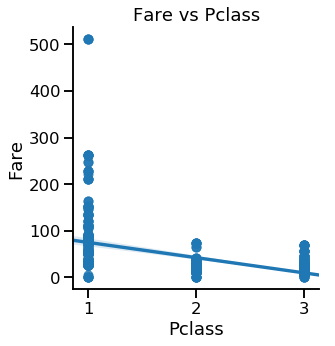

In [20]:
#Numeric value for how visible the item is

sns.set_context('talk')
sns.lmplot(x='Pclass', y='Fare', data=train_df, palette='rocket')
plt.title('Fare vs Pclass')

- A definite negative correlation can be observed here.


- As Pclass standard improves the Fare price increases. For Upper class the fare price reaches peak of 500.


- We cannot consider this as a strong relation. But Fare Price doesn't really make sense in prediction of survival of a subject. we'll drop it.

In [21]:
#Let us drop unwanted columns from both train and test set

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

Text(0.5, 1.0, 'Pearson Correlation')

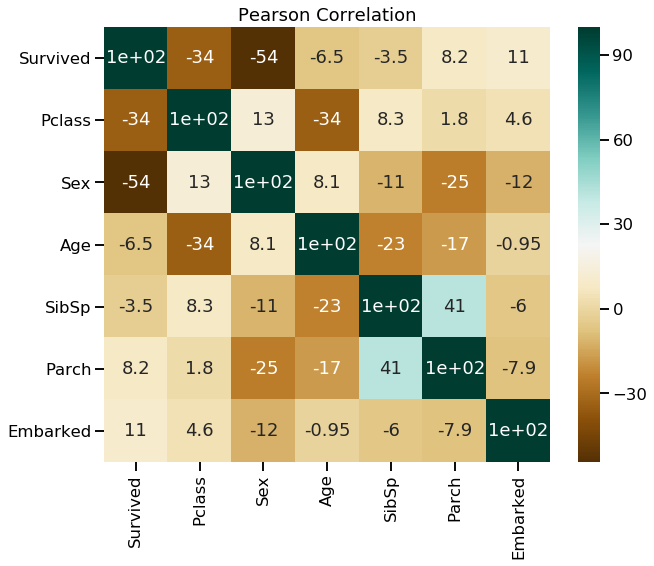

In [22]:
#Pearson correlation

plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr()*100, annot=True, cmap='BrBG')
plt.title('Pearson Correlation')

- Above heatmap signifies correlation value (Scaled to -100 to 100).


- We are not able to get any strong Positive / Negative correlation in this plot.

### Building a Statistical Model

- In this section we'll build a predictive model using Logistic Regression as base estimator.


- We'll also hypertune our model to get the best out of it.


- In final stage , we'll dump our model to Local disk and use it as a backend of prediction for our front end local web page created by Flask.

In [23]:
#metrics implementation
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, accuracy_score

X = train_df.drop('Survived', axis=1)
y = train_df.Survived

#train test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=32)
xtrain.shape, xtest.shape

((668, 6), (223, 6))

- We'll split 25% of training data for validation set.


- We are also importing required metrics for our evaluation purpose.

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

Accuracy Score : 0.7847533632286996
Cross Validation Score : 0.7889080911233307 

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       133
           1       0.72      0.76      0.74        90

   micro avg       0.78      0.78      0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223
 



Text(0.5, 1.0, 'Confusion Matrix')

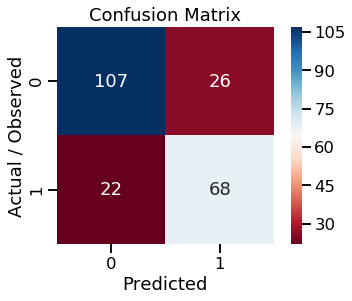

In [24]:
#logistic regression implementation
from sklearn.linear_model import LogisticRegression

#estimator
log_reg = LogisticRegression(solver='lbfgs', class_weight='balanced').fit(xtrain, ytrain)
print (log_reg)

#prediction
pred = log_reg.predict(xtest)

#metrics evaluation
print ('\nAccuracy Score :', accuracy_score(ytest, pred))
print ('Cross Validation Score :', cross_val_score(log_reg, xtrain, ytrain, cv=5).mean(), '\n')
print (classification_report(ytest, pred), '\n')

sns.heatmap(confusion_matrix(ytest, pred), annot=True, square=True, fmt='d', cmap='RdBu')
plt.ylabel('Actual / Observed')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

- We had got Accuracy score and Cross validation score of Approx. 78.


- Confusion matrix tells us that out of 133 examples of "Not survived" , 107 are classified correctly while 26 are misclassified.


- Whereas, out of 90 "Survived" , 68 are correctly classified and 22 are misclassified.

### Hyper-Parameter Tuning

- Here we'll try to tune our model by passing bunch of parameters in it.

Best Params : {'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}

Best Cross Validated Score : 0.7919161676646707
Accuracy Score : 0.7757847533632287
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       133
           1       0.71      0.74      0.73        90

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223
 



Text(0.5, 1.0, 'Confusion Matrix')

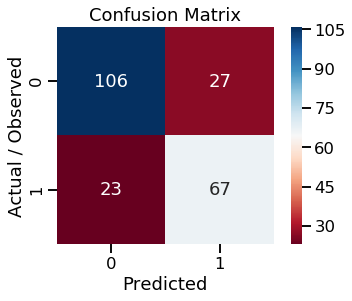

In [25]:
#parameters
params = {'C':[1.0,0.5], 'max_iter':[100,200,300,500], 'penalty':['l1','l2']}

#tuned estimator
grid = GridSearchCV(estimator=LogisticRegression(class_weight='balanced', multi_class='auto', solver='liblinear'),
                   param_grid=params, cv=3, return_train_score=True, n_jobs=-1, scoring='accuracy')

grid.fit(xtrain, ytrain)

#prediction
grid_pred = grid.predict(xtest)

#metrics evaluation
print ('Best Params :',grid.best_params_)
print ('\nBest Cross Validated Score :',grid.best_score_)
print ('Accuracy Score :', accuracy_score(ytest, grid_pred))
print (classification_report(ytest, grid_pred), '\n')

sns.heatmap(confusion_matrix(ytest, grid_pred), annot=True, square=True, fmt='d', cmap='RdBu')
plt.ylabel('Actual / Observed')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

- Hyper parameter tuning actually didn't worked well for us.


- Accuracy score droped a little as well as confusion matrix is misclassfying a bit.


- We'll go ahead with Logistic Regression, our intial estimator.

### ROC-AUC (Receiver Operating Characteristics - Area Under Curve)


- It is a performance measurement for classification problem.


- ROC is a probability curve and AUC represents degree or measure of separability.


- It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 


- By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.


- The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

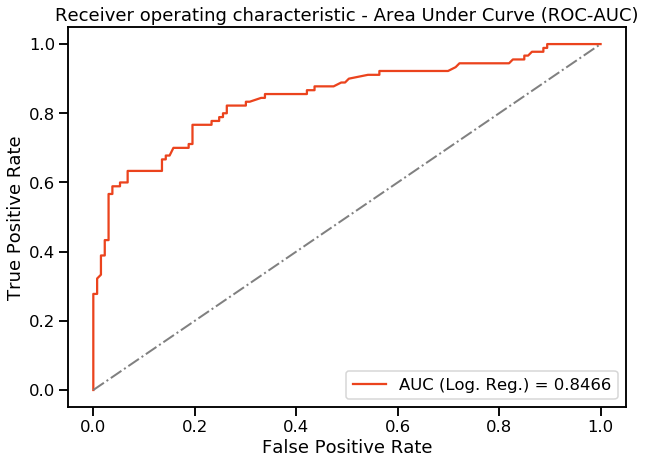

In [22]:
#Roc-Auc

log_prob = log_reg.predict_proba(xtest)
fpr, tpr, _ = roc_curve(ytest, log_prob[:,1])
log_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot([0,1], 'grey', lw=2, linestyle='-.')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

- We have achieved ROC-AUC score of 0.84


- As mentioned before the score closer to 1 meaning better the model.


- Let us now predict on test set. 

In [35]:
#test prediction
test_pred = log_reg.predict(test_df)

#loading submission file
sub = pd.read_csv(path+'gender_submission.csv', header=0).set_index('PassengerId')
sub['Survived'] = test_pred
sub.to_csv(path+'final_sub.csv')

In [36]:
#lets dump model on disk using pickle

model_dumping = dump(log_reg, open('titanic_model.pkl', 'wb'))
model_load = load(open('titanic_model.pkl', 'rb'))

In [37]:
#Let us demonstrate our model

values = [[2,0,23,1,3,1]]

'''def norm_val(val):
    return ss.transform(val)'''

model_load.predict(values)[0]

1

- For model deployment, check "titanic_app.py" file. Detailed explaination provided in the file.


- Dump the pickle model in the same directory where our flask framework is located.


- Index / Home page is routed through "titanic_app.py".


- **Flask** is a micro web framework written in Python. It is classified as a microframework because it does not require particular tools or libraries.

### Conclusion :

- We built a basic model using Logistic Regression as our estimator.

### References :

- Thanks to Mr. Krishna Naik. Idealogy behind Flask implementation and code files including Home page, CSS file was downloaded from repository and modified according to the needs : **https://github.com/krishnaik06/Deployment-flask**

### What's next ?

- One can try also implement Ensemble method, Tree Algorithm and / or Deep Neural Network Modelling for better accuracy.